# **IS 590PR Final Project. Fall 2019** 
### By Shruti Shakhla
### Problem Statement :
   Using Monte Carlo to analyze the change in Business revenue of an organization by increasing the click through rate of the organizations website.
### Hypothesis :
Increasing the click through rate of one webpage(homepage in this case) increases the traffic to the website hence increases the profits.



In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import CTR, simulations, helper
plt.style.use('default')

### Data :
Data is matrix that represents the business of a website. 
The site has a landing home page, a Frequently Asked Questions (FAQ) page, a product page (where it lists the for sale products), and then pages for the two products the business offers. Each product can only be purchased from the product page.
Each row lists the connection probability between pages.

 The below 3 cells contain three different functions that together generate a CTR matrix that has random values for probablities which adhere to the following constarints:
    1. The sum of all values in a row of the matrix should either be zero or one 
    (since these are probablities, thus the total sum can either be zero or one)
    2. The probablities of a user traversing from the item page to the purchase page is always 0.15 because I have considered that for increasing the CTR  
    website and not the people buying the product
    3. All the random variables must be < 1
    

# Analysis of the hypothesis

In [2]:
a, b, c, d = simulations.simulate_for_groups()

In [10]:
helper.printStats(a, b, c, d, 1000)

Average Revenue/user:  255.75
Average Bounce Rate:  7.107
Average Item 1 Purchases:  1.551
Average Item 2 Purchases:  1.342



Text(0.5, 1.0, 'Revenue Per User')

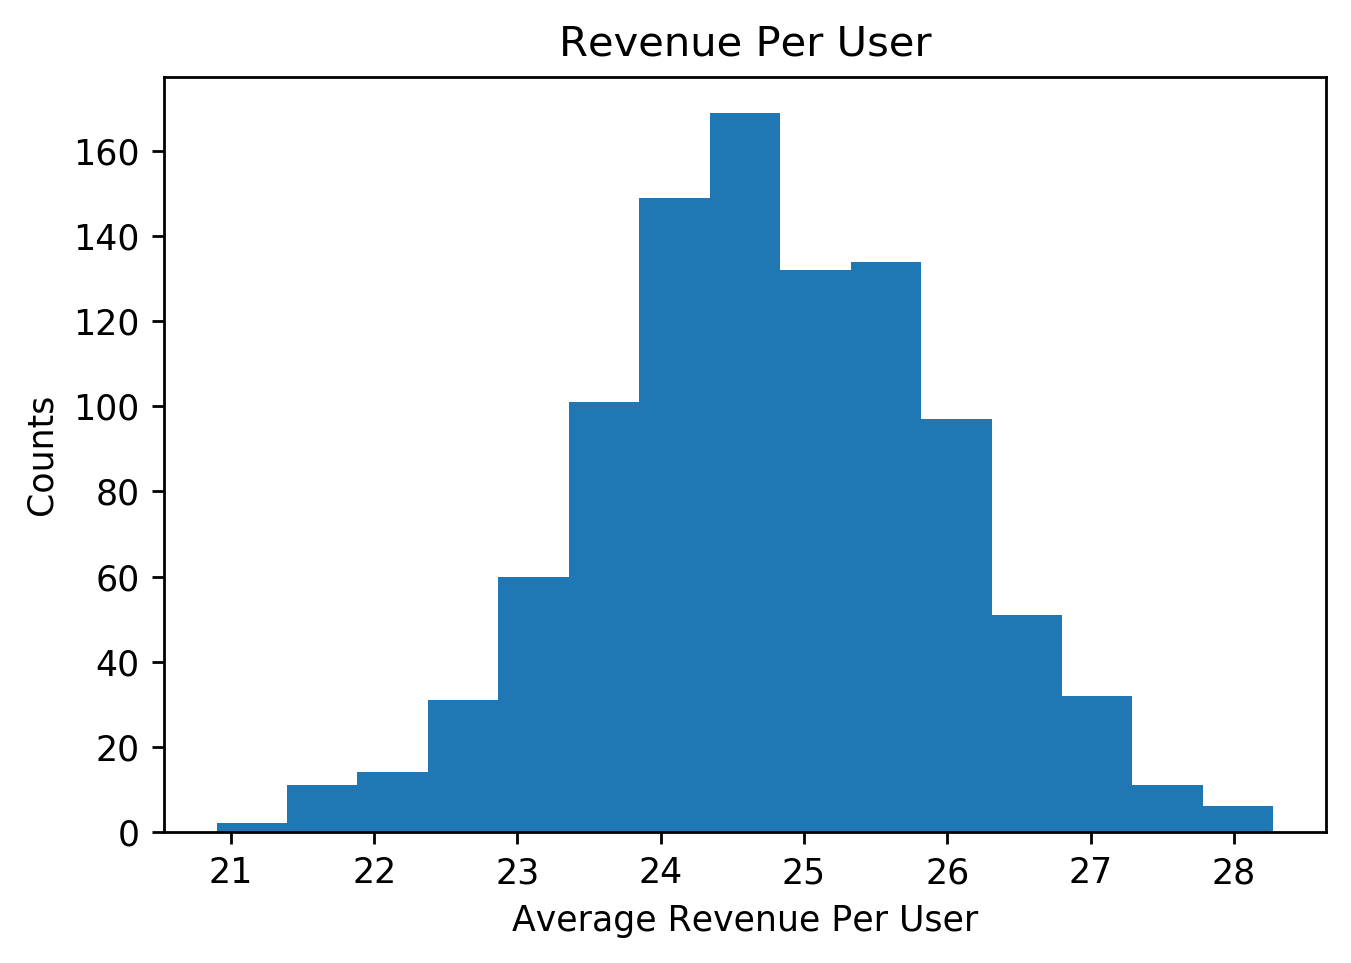

In [5]:
plt.figure(dpi=250)
plt.hist(np.array(a)/1000, bins=15);
plt.xlabel("Average Revenue Per User")
plt.ylabel("Counts")
plt.title("Revenue Per User")

Text(0.5, 1.0, 'Revenue Per User after Marketing Strategy')

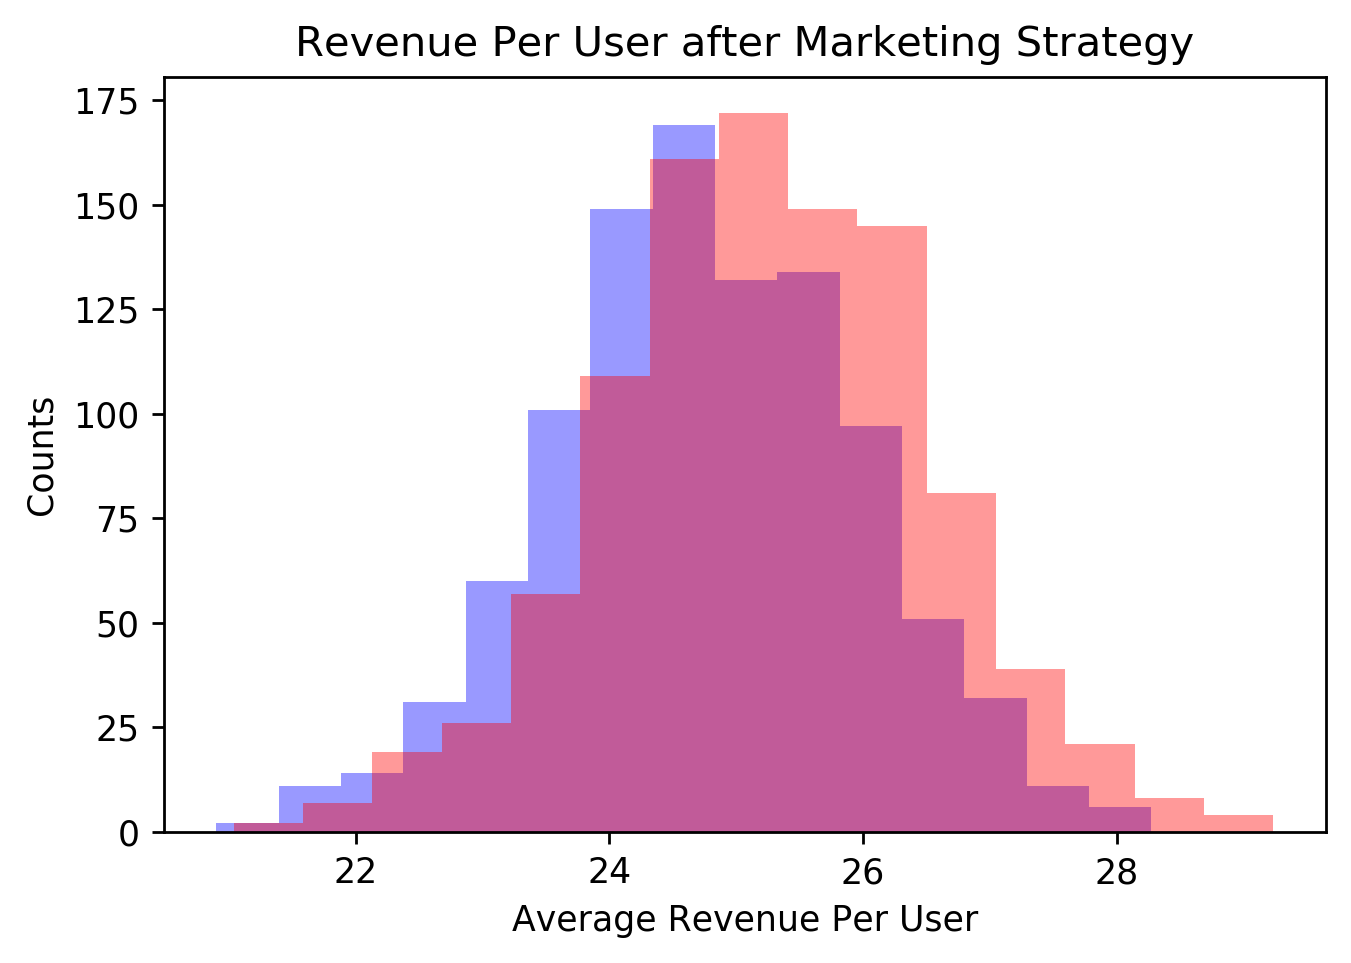

In [6]:
a2 = helper.get_after_market_values(a)

plt.figure(dpi=250)
plt.hist(np.array(a)/1000, bins=15, color='b', alpha = 0.4)
plt.hist(np.array(a2)/1000, bins=15, color='r', alpha = 0.4)
plt.xlabel("Average Revenue Per User")
plt.ylabel("Counts")
plt.title("Revenue Per User after Marketing Strategy")

In [7]:
revenue, item1Total, item2Total, bounceTotal, groups, iterations = [], [], [], [], 10, 10**4
revenue2, item1Total2, item2Total2, bounceTotal2 = [],  [], [],  []

for i in range(groups):
    CTR1 = CTR.generate_CTR_dataFrame()
    CTR2 = helper.get_hypothesis_CTR(CTR1)
    one, two, three, four = simulations.simulate_iterations(iterations, CTR1)
    revenue, bounceTotal, item1Total, item2Total = revenue + [one],  bounceTotal + [two], item1Total + [three], item2Total + [four]
    
    a, b, c, d = simulations.simulate_iterations(iterations, CTR2)
    revenue2, bounceTotal2, item1Total2, item2Total2 = revenue2 + [a],  bounceTotal2 + [b], item1Total2 + [c], item2Total2 + [d]
    

In [11]:
helper.printStats(revenue, bounceTotal, item1Total, item2Total, iterations)

Average Revenue/user:  22.0805
Average Bounce Rate:  0.75053
Average Item 1 Purchases:  0.13480999999999999
Average Item 2 Purchases:  0.11465999999999998



In [12]:
helper.printStats(revenue2, bounceTotal2, item1Total2, item2Total2, iterations)

Average Revenue/user:  22.039
Average Bounce Rate:  0.7510600000000001
Average Item 1 Purchases:  0.13474
Average Item 2 Purchases:  0.1142



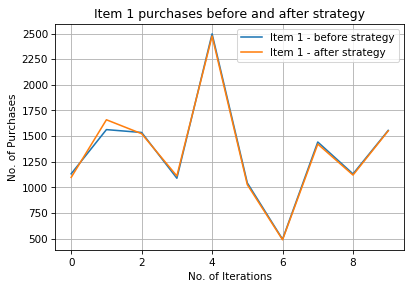

In [13]:
plt.figure(dpi=75)
plt.plot(item1Total)
plt.plot(item1Total2)
plt.title('Item 1 purchases before and after strategy')
plt.ylabel('No. of Purchases')
plt.xlabel('No. of Iterations')
plt.legend(['Item 1 - before strategy', 'Item 1 - after strategy'])
plt.grid()
plt.show()

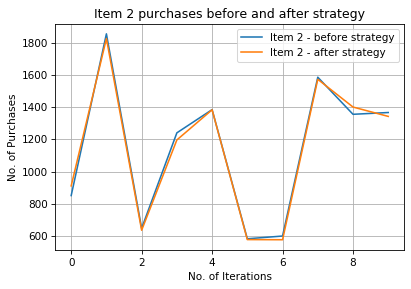

In [14]:
plt.figure(dpi=75)
plt.plot(item2Total)
plt.plot(item2Total2)
plt.title('Item 2 purchases before and after strategy')
plt.ylabel('No. of Purchases')
plt.xlabel('No. of Iterations')
plt.legend(['Item 2 - before strategy', 'Item 2 - after strategy'])
plt.grid()
plt.show()